Dataset link : https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "data/ad_click_dataset.csv",
    usecols=[
        "age",
        "gender",
        "device_type",
        "browsing_history",
        "time_of_day",
        "click",
    ],
)
df.head()

,age,gender,device_type,browsing_history,time_of_day,click
0,22.0,NaN,Desktop,Shopping,Afternoon,1
1,NaN,Male,Desktop,NaN,NaN,1
2,41.0,Non-Binary,NaN,Education,Night,1
3,34.0,Male,NaN,Entertainment,Evening,1
4,39.0,Non-Binary,NaN,Social Media,Morning,0


In [3]:
df = df.dropna()

In [4]:
cat_cols = ['gender', 'device_type', 'browsing_history', 'time_of_day']

for col in cat_cols:
    df[col], _ = pd.factorize(df[col])

In [5]:
df.head()

,age,gender,device_type,browsing_history,time_of_day,click
17,56.0,0,0,0,0,1
25,43.0,1,0,1,1,1
33,37.0,1,1,0,2,0
52,49.0,1,1,0,0,1
83,22.0,0,2,2,2,0


In [6]:
X = df.drop("click", axis=1)
y = df["click"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99, stratify=y
)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    early_stopping=True,
    n_iter_no_change=20,
    random_state=99,
)

In [10]:
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)
model.fit(X_train_scaled, y_train, sample_weight=weights)

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,99


In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54        74
           1       0.73      0.66      0.69       126

    accuracy                           0.63       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.64      0.63      0.63       200



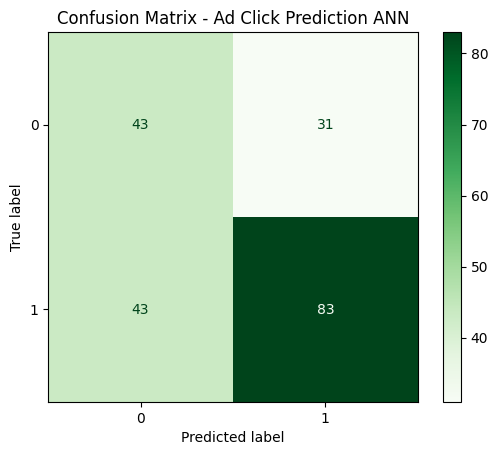

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Ad Click Prediction ANN")
plt.show()